# Numerical Integration

Basic Purpose: Calculating the numerical value of a definite integral:
$$
I = \int_a^b f(x)\ \mathrm{d}x
$$
Example:
$$
f(x) = \sqrt{1-x^2}; \quad I = \int_0^{\sqrt{2}\over 2}\sqrt{1-x^2} \mathrm{d}x
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


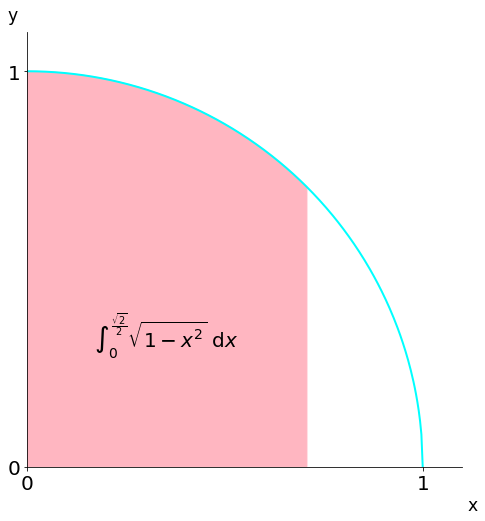

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon
from matplotlib.collections import PatchCollection


#################### Define the function we need ####################
def func(x):
    return np.sqrt(1-x**2)

#################### Visulize the integral ####################

a, b = 0, np.sqrt(2)/2  # integral limits
x = np.linspace(0, 1, 300)
y = func(x)
result = (2+np.pi)/8

# Define figure size
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(x, y, 'r', linewidth=2, color ="cyan")
plt.ylim([0,1.1])
plt.xlim([0,1.1])

# Make the shaded region
ix = np.linspace(a, b, 300)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5', color="lightpink")
ax.add_patch(poly)

plt.rc('text')
plt.text(0.35, 0.3, r"$\int_0^\frac{\sqrt{2}}{2}\sqrt{1-x^2}\ \mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, 'x', size="xx-large")
plt.figtext(0.1, 0.9, 'y', size="xx-large")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_aspect('equal')

ax.set_xticks((0, 1))
ax.set_yticks([0,1])
ax.tick_params(labelsize = 20)

plt.show()

By some simple calculation, we can get the result $I = (2+\pi) / 8 \approx 0.642699$. Now let's use some numerical methods to calculate this integral.

## Integration methods
### Rectangle rule
Rectangle rule uses rectangles to approximate the area under a curve:
$$
\int _{a}^{a+\Delta x}f(x) \ dx \approx \Delta x \ f\left(a + \frac{\Delta x}{2}\right)
$$

In [ ]:
#################### visulize the integration ####################

def quad_func(x, x0, x1, x2):
    y0 = func(x0)
    y1 = func(x1)
    y2 = func(x2)
    
    # the quadratic interpolated function
    return y0*(x-x1)*(x-x2)/((x0-x1)*(x0-x2)) + y1*(x-x0)*(x-x2)/((x1-x0)*(x1-x2)) + y2*(x-x0)*(x-x1)/((x2-x0)*(x2-x1))

def integrate_plot(N, method):
    x = np.linspace(a, b, 300)
    y = func(x)

    # Define figure size
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.plot(x, y, 'r', linewidth=2)
    plt.ylim([0,0.7])
    plt.xlim([0,0.7])

    # Define rectangles
    currentAxis = plt.gca()
    if method == 'rectangle':
        for i in range(N):
            currentAxis.add_patch(Rectangle((a+i*dx, 0), dx, func(a+(i+0.5)*dx), fill=True, alpha = 0.3, color='grey'))
            currentAxis.add_patch(Rectangle((a+i*dx, 0), dx, func(a+(i+0.5)*dx), fill=None, lw=2))
    elif method == 'trapezoid':
        for i in range(N):
            currentAxis.add_patch(\
                Polygon([[i*dx,0],[(i+1)*dx,0],[(i+1)*dx,func((i+1)*dx)],[i*dx,func(i*dx)]], True, alpha=0.3, color='grey'))
            currentAxis.add_patch(\
                Polygon([[i*dx,0],[(i+1)*dx,0],[(i+1)*dx,func((i+1)*dx)],[i*dx,func(i*dx)]], True, fill=None, lw=2))
    elif method == 'simpsons':
        for i in range(N):
            ix = np.linspace(2*i*dx, ((2*i)+2)*dx, 300)
            iy = quad_func(ix, ((2*i))*dx, ((2*i)+1)*dx, ((2*i)+2)*dx)
            verts = [(2*i*dx, 0)] + list(zip(ix, iy)) + [(((2*i)+2)*dx, 0)]

            currentAxis.add_patch(Polygon(verts, True, alpha=0.3, color='grey'))
            currentAxis.add_patch(Polygon(verts, True, fill=None, lw=2))

    plt.figtext(1, 0.4, \
                "$N$ = %i \n $I_{approx}$ =  %.12f \n $I_{true}$ = %.12f \n $\delta I = I_{approx} - I_{ture}$ = %.12f" \
                % (N, Sum, result, abs(result-Sum)), size=30)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_aspect('equal')

    ax.set_xticks((0, 0.8))
    ax.set_yticks([0,1])
    ax.tick_params(labelsize = 20)

    plt.show()

When N = 2, I ≈ 0.647724742884. The error is 0.005025661185.


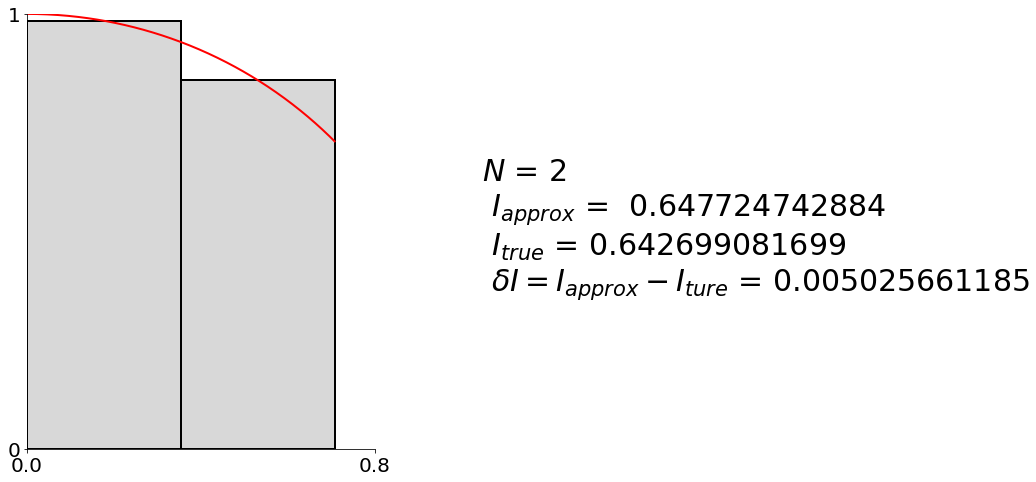

In [ ]:
a, b = 0, np.sqrt(2)/2  # integral limits
N = 2 # Number of intervals

dx = (b-a)/N # length of each interval

#################### Calculate the sum of each rectangles ####################
Sum = 0.0
for i in range(N):
    Sum = Sum + ( dx * func(a+i*dx+dx/2) )
    
print("When N = %d, I ≈ %.12f. The error is %.12f." %(N, Sum, abs((2+np.pi)/8-Sum)) )


#################### Visulize the integral ####################
integrate_plot(N, 'rectangle')

### Trapezoidal rule
Trapezoidal rule uses a trapezium to approximate the area under the curve:
$$
\int_{a}^{a+\Delta x}f(x)\,\mathrm{d}x\approx \Delta x \ \left[\frac{f(a)+f(a+\Delta x)}{2}\right]
$$

When N = 3, I ≈ 0.638115741997. The error is 0.004583339701.


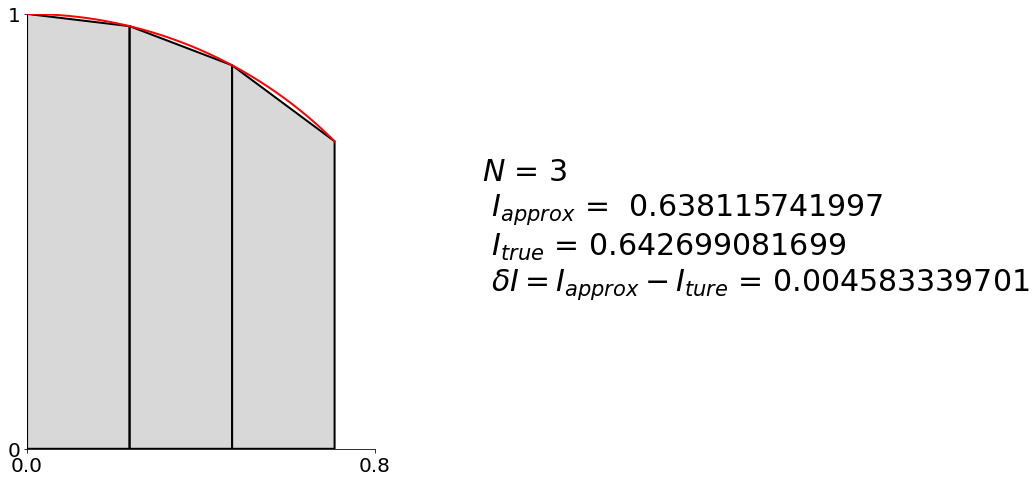

In [ ]:
a, b = 0, np.sqrt(2)/2  # integral limits
N = 3 # Number of intervals

dx = (b-a)/N # length of each interval

#################### Calculate the sum of each triangles ####################
Sum = 0.0
for i in range(N):
    Sum = Sum + dx * ( func(i*dx) + func((i+1)*dx) )  / 2
    
print("When N = %d, I ≈ %.12f. The error is %.12f." %(N, Sum, abs(result-Sum)) )


#################### Visulize the integral ####################
x = np.linspace(a, b, 300)
integrate_plot(N, 'trapezoid')

### More complicated method: Simpson's rule
Simpson's rule uses a quadratic function to interpolate the original function and then integrate it. The interpolation can be shown as:
![??](simpson.png)
After this treatment, the integration law can be written as:
$$
\int_a^{a+2\Delta x}f(x)\,\mathrm{d}x \approx \frac{\Delta x}{3}{\large[} f(a) + 4f(a+\Delta x) + f(a+2\Delta x) {\large]}
$$

When N = 1, I ≈ 0.642143015375. The error is 0.000556066324.


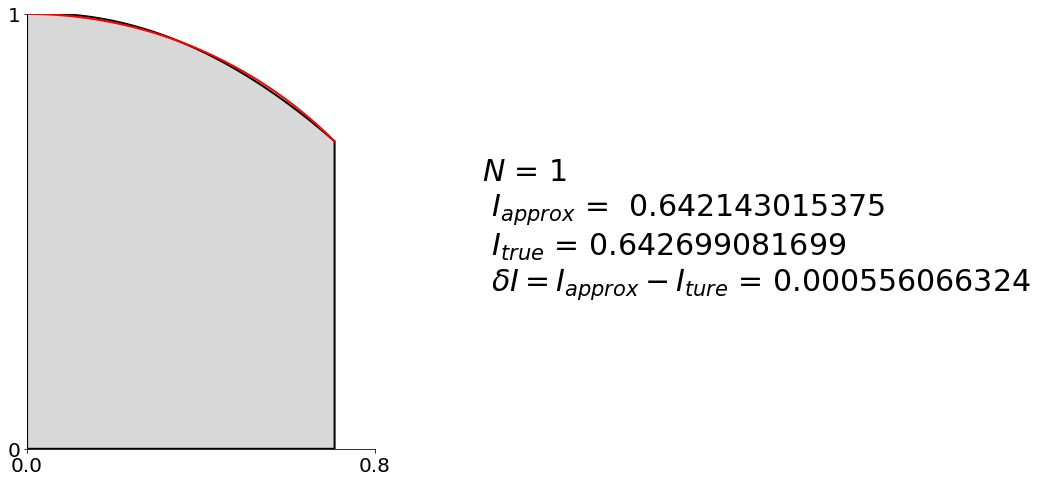

In [ ]:
a, b = 0, np.sqrt(2)/2  # integral limits
N = 1 # Number of intervals
dx = (b-a)/(2*N) # length of each interval, note in this case dx is 1/2 of the length of the interval

#################### Calculate the sum of each triangles ####################
Sum = 0.0
for i in range(N):
    Sum = Sum + (dx/3) * ( func((2*i)*dx) + 4*func(((2*i)+1)*dx) + func(((2*i)+2)*dx))
    
print("When N = %d, I ≈ %.12f. The error is %.12f." %(N, Sum, abs(result-Sum)) )


#################### Visulize the integral ####################
integrate_plot(N, 'simpsons')

## Error analysis
It seems that Simpson's rule is more accurate than the other two methods. More detailed analysis confirms this assumption.

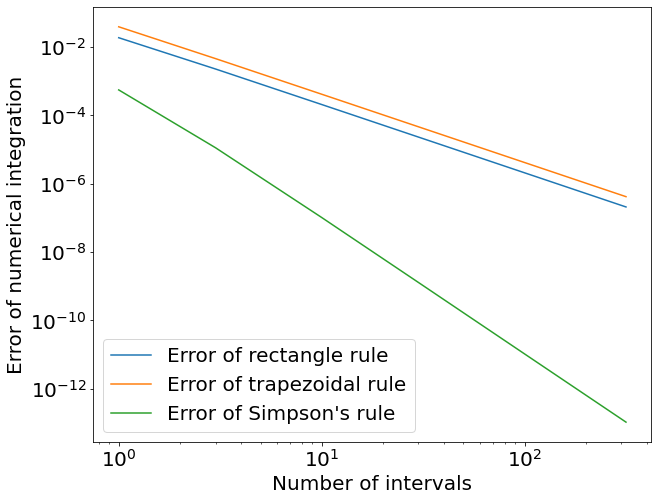

In [ ]:
def rect_error(N):
    dx = b/N
    Sum = 0.0
    for i in range(N):
        Sum = Sum + ( dx * func(i*dx+dx/2) )
    
    return abs(result-Sum)
    

def trap_error(N):
    dx = b/N
    Sum = 0.0
    for i in range(N):
        Sum = Sum + dx * ( func(i*dx) + func((i+1)*dx) )  / 2
        
    return abs(result-Sum)

def simp_error(N):
    dx = b/(2*N)
    Sum = 0.0
    for i in range(N):
        Sum = Sum + (dx/3) * ( func((2*i)*dx) + 4*func(((2*i)+1)*dx) + func(((2*i)+2)*dx) )
        
    return abs(result-Sum)

num = 10**np.arange(0,3,0.5)
N_list = num.astype(int)

fig, ax = plt.subplots(figsize=(10, 8))

plt.loglog(N_list, [rect_error(N) for N in N_list], label='Error of rectangle rule')
plt.loglog(N_list, [trap_error(N) for N in N_list], label='Error of trapezoidal rule')
plt.loglog(N_list, [simp_error(N) for N in N_list], label='Error of Simpson\'s rule')
plt.legend(fontsize=20)
plt.xlabel('Number of intervals', fontsize=20)
plt.ylabel('Error of numerical integration', fontsize=20)
ax.tick_params(labelsize = 20)
plt.show()